In [3]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,PowerTransformer
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, HuberRegressor

### DATA_SET:

The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with period of one year.

* date
* average_temperature
*  minimum_temperature
* maximum_temperature
* precipitation
* weekend
* beer_consumption (target attribute)

In [5]:
df = pd.read_csv("Consumo_cerveja.csv")
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.000000,25.461000
1,2015-01-02,"27,02","24,5","33,5",0,0.000000,28.972000
2,2015-01-03,"24,82","22,4","29,9",0,1.000000,30.814000
3,2015-01-04,"23,98","21,5","28,6","1,2",1.000000,29.799000
4,2015-01-05,"23,82",21,"28,3",0,0.000000,28.900000


In [52]:
df.tail()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# number of rows and no. of cols
rows,cols = df.shape
print('Number of rows =',rows)
print('Number of columns =',cols)

Number of rows = 941
Number of columns = 7


We need to change the name of the columns as given above

In [7]:
df.columns = ["Date", "Average_Temperature", "Minimum_Temperature",
              "Maximum_Temperature", "Precipitation", "Weekend",
              "Beer_Consumption"]
df.head()

,Date,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
0,2015-01-01,"27,3","23,9","32,5",0,0.000000,25.461000
1,2015-01-02,"27,02","24,5","33,5",0,0.000000,28.972000
2,2015-01-03,"24,82","22,4","29,9",0,1.000000,30.814000
3,2015-01-04,"23,98","21,5","28,6","1,2",1.000000,29.799000
4,2015-01-05,"23,82",21,"28,3",0,0.000000,28.900000


In [8]:
df.isnull().sum()

Date                   576
Average_Temperature    576
Minimum_Temperature    576
Maximum_Temperature    576
Precipitation          576
Weekend                576
Beer_Consumption       576
dtype: int64

To remove all columns having NaN

In [9]:
df.dropna(how="all", inplace=True)

In [10]:
df.tail()

,Date,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
360,2015-12-27,24,"21,1","28,2","13,6",1.000000,32.307000
361,2015-12-28,"22,64","21,1","26,7",0,0.000000,26.095000
362,2015-12-29,"21,68","20,3","24,1","10,3",0.000000,22.309000
363,2015-12-30,"21,38","19,3","22,4","6,3",0.000000,20.467000
364,2015-12-31,"24,76","20,2",29,0,0.000000,22.446000


In [11]:
# number of rows and no. of cols
rows,cols = df.shape
print('Number of rows =',rows)
print('Number of columns =',cols)

Number of rows = 365
Number of columns = 7


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Average_Temperature  365 non-null    object 
 2   Minimum_Temperature  365 non-null    object 
 3   Maximum_Temperature  365 non-null    object 
 4   Precipitation        365 non-null    object 
 5   Weekend              365 non-null    float64
 6   Beer_Consumption     365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 22.8+ KB


In [13]:
df.isnull().sum()

Date                   0
Average_Temperature    0
Minimum_Temperature    0
Maximum_Temperature    0
Precipitation          0
Weekend                0
Beer_Consumption       0
dtype: int64

Date set contains multiple “,” in four columns instead of decimal in numerical values, replacing every “,” with “.”
And converting object to float

In [14]:
cols = df.columns[1:5]
for col in cols:
    df[col] = df[col].str.replace(",", ".")
    df[col] = df[col].apply(pd.to_numeric)

In [62]:
df.head(2)

,Date,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
0,2015-01-01,27.300000,23.900000,32.500000,0.000000,0.000000,25.461000
1,2015-01-02,27.020000,24.500000,33.500000,0.000000,0.000000,28.972000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 365 non-null    object 
 1   Average_Temperature  365 non-null    float64
 2   Minimum_Temperature  365 non-null    float64
 3   Maximum_Temperature  365 non-null    float64
 4   Precipitation        365 non-null    float64
 5   Weekend              365 non-null    float64
 6   Beer_Consumption     365 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.8+ KB


Splitting of Date column into multiple other columns like day, month, year.

In [16]:
df["Date"] = pd.to_datetime(df["Date"])
df["Day"] = df["Date"].dt.day
df["Month"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year

In [17]:
df.drop("Date", axis=1, inplace=True)

In [18]:
df = df[["Day", "Month", "Year", "Average_Temperature", "Minimum_Temperature",
              "Maximum_Temperature", "Precipitation", "Weekend",
              "Beer_Consumption"]]
df.head(2)

,Day,Month,Year,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
0,1,1,2015,27.300000,23.900000,32.500000,0.000000,0.000000,25.461000
1,2,1,2015,27.020000,24.500000,33.500000,0.000000,0.000000,28.972000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  365 non-null    int64  
 1   Month                365 non-null    int64  
 2   Year                 365 non-null    int64  
 3   Average_Temperature  365 non-null    float64
 4   Minimum_Temperature  365 non-null    float64
 5   Maximum_Temperature  365 non-null    float64
 6   Precipitation        365 non-null    float64
 7   Weekend              365 non-null    float64
 8   Beer_Consumption     365 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 28.5 KB


In [20]:
df.describe()

,Day,Month,Year,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,15.720548,6.526027,2015.000000,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,8.808321,3.452584,0.000000,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,1.000000,1.000000,2015.000000,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,8.000000,4.000000,2015.000000,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,16.000000,7.000000,2015.000000,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.000000,10.000000,2015.000000,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,31.000000,12.000000,2015.000000,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


Finding outliers

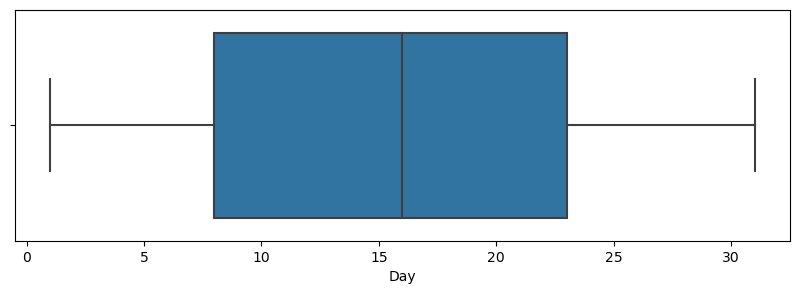

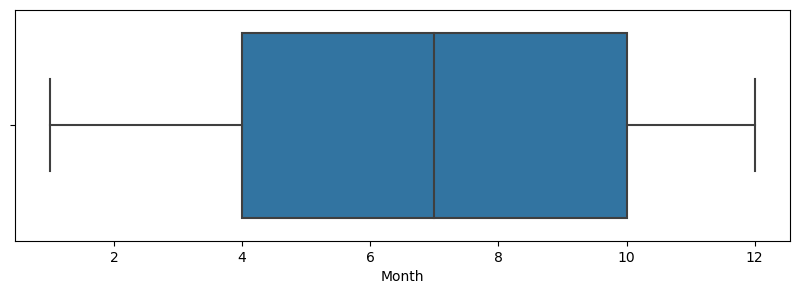

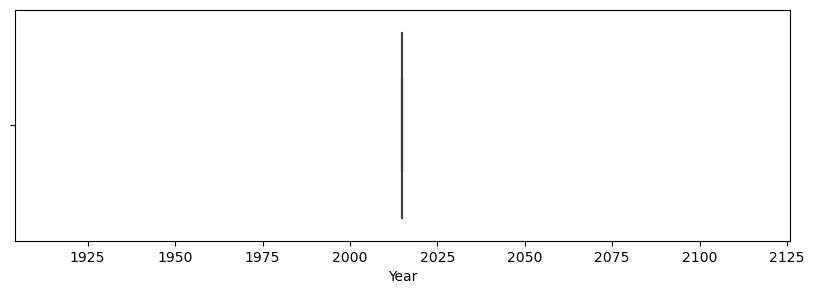

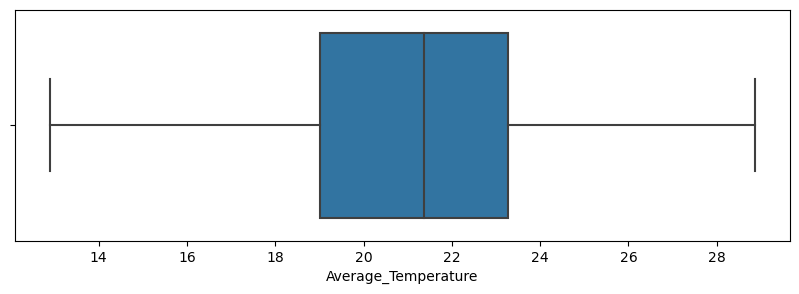

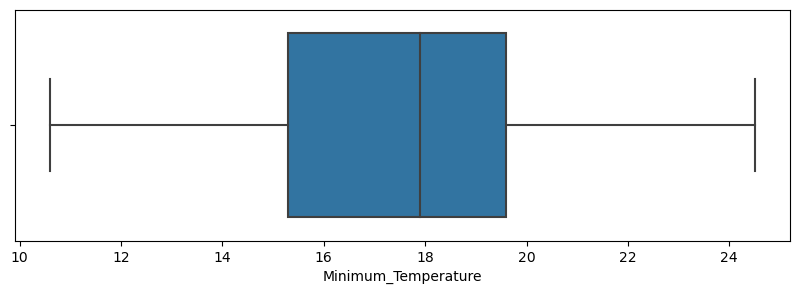

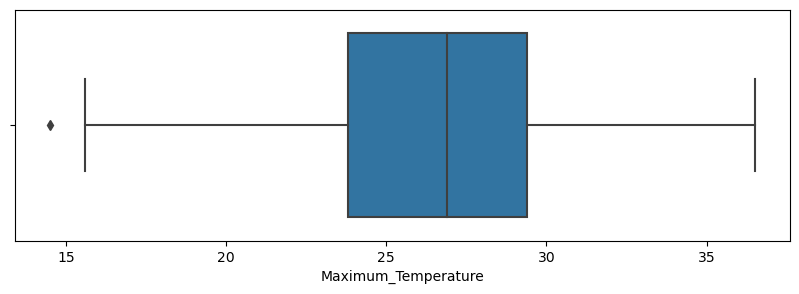

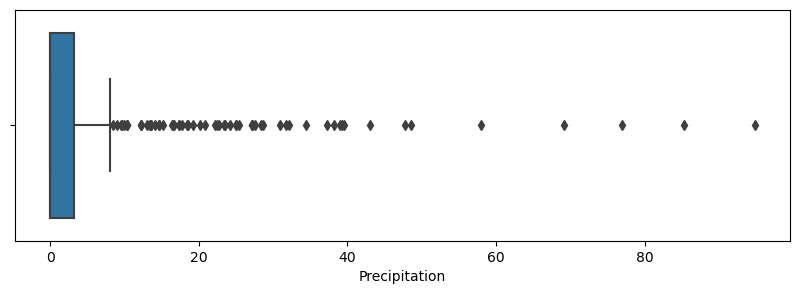

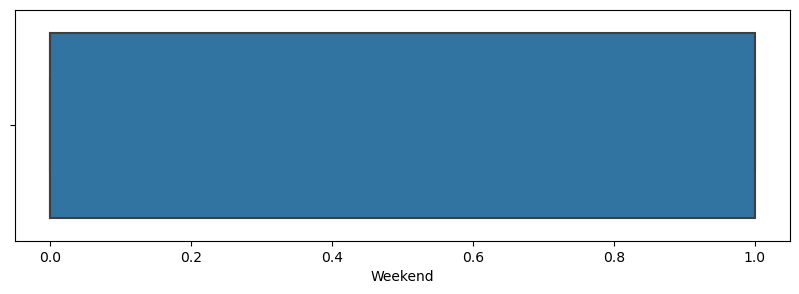

In [69]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=(column),data=df)

In [ ]:
Removing outliers

In [70]:
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    q2=q3-q1
    lower_range=q1-(1.5*q2)
    upper_range=q3+(1.5*q2)
    df[column]=np.where(df[column]<lower_range,lower_range,df[column])
    df[column]=np.where(df[column]>upper_range,upper_range,df[column])

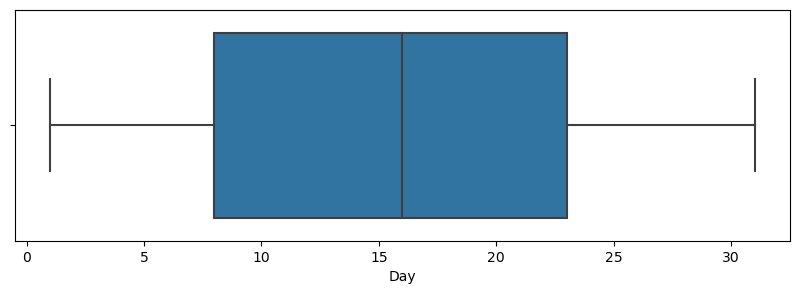

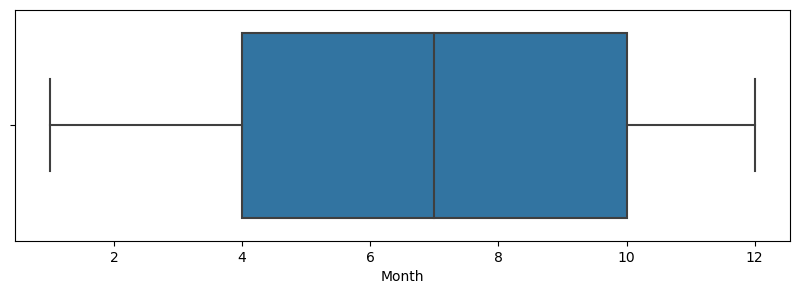

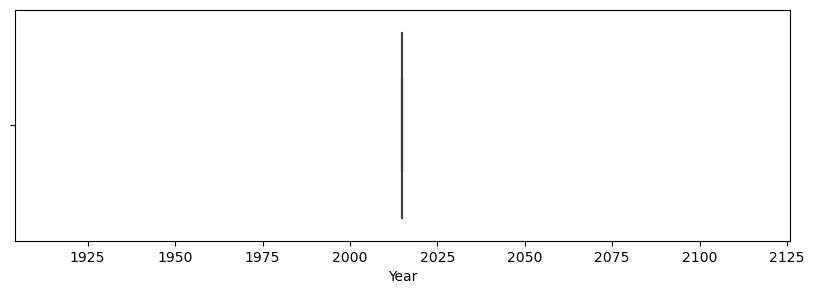

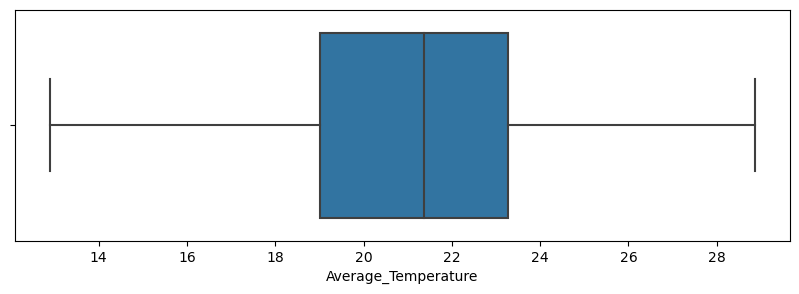

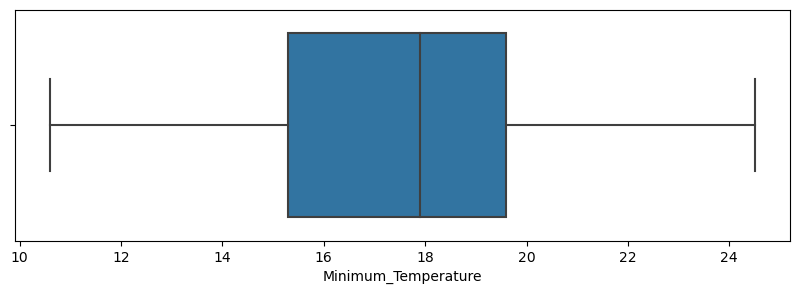

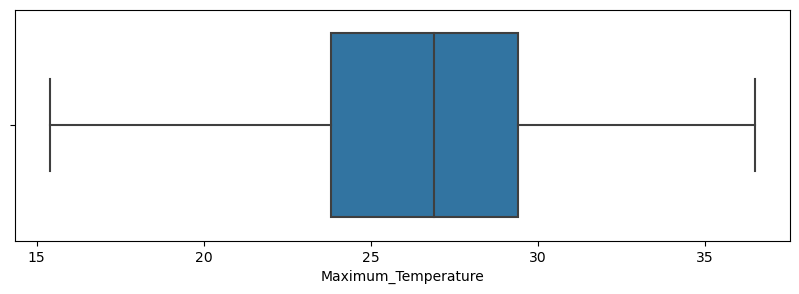

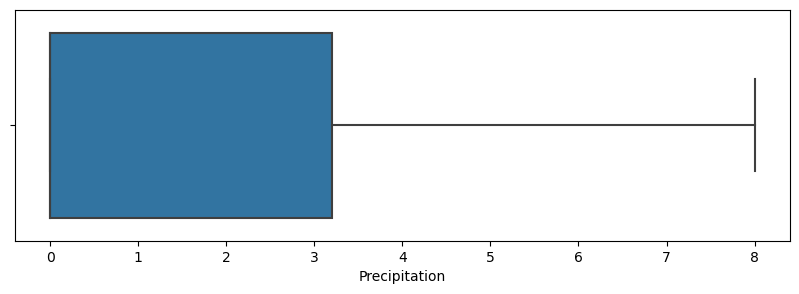

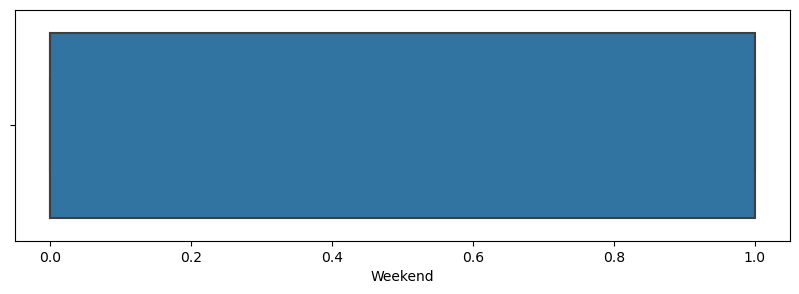

In [71]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(10,3))
    sns.boxplot(x=(column),data=df)

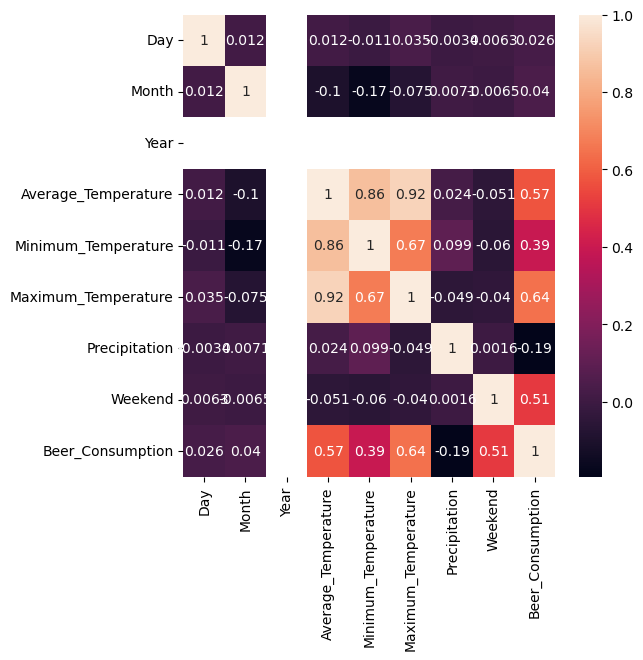

In [21]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(6,6))
ax = sns.heatmap(df[features].corr(),annot=True)

In [22]:
correlation = df.corr(method='pearson')
correlation

,Day,Month,Year,Average_Temperature,Minimum_Temperature,Maximum_Temperature,Precipitation,Weekend,Beer_Consumption
Day,1.000000,0.011893,NaN,0.012382,-0.011206,0.035079,-0.003414,0.006254,0.025969
Month,0.011893,1.000000,NaN,-0.103169,-0.172923,-0.074866,0.007089,-0.006526,0.039908
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average_Temperature,0.012382,-0.103169,NaN,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Minimum_Temperature,-0.011206,-0.172923,NaN,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Maximum_Temperature,0.035079,-0.074866,NaN,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitation,-0.003414,0.007089,NaN,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Weekend,0.006254,-0.006526,NaN,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Beer_Consumption,0.025969,0.039908,NaN,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


In [23]:
print(correlation ['Beer_Consumption'].sort_values(ascending=False).to_string())

Beer_Consumption       1.000000
Maximum_Temperature    0.642672
Average_Temperature    0.574615
Weekend                0.505981
Minimum_Temperature    0.392509
Month                  0.039908
Day                    0.025969
Precipitation         -0.193784
Year                        NaN


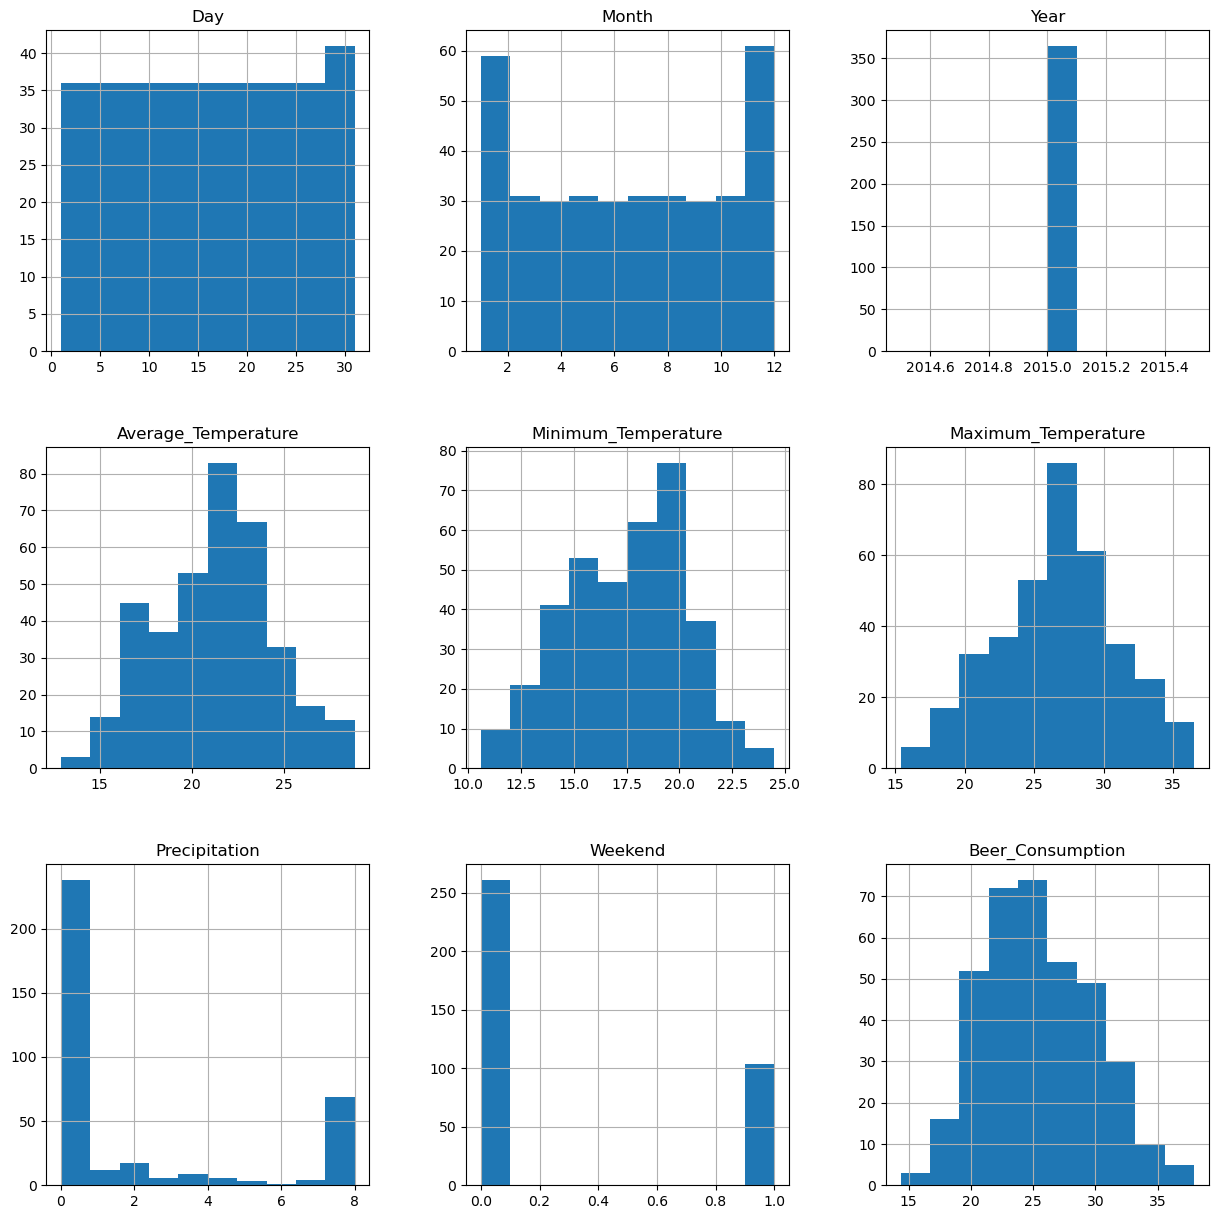

In [75]:
plot = df.hist(figsize=(15,15))

Data splitting

In [25]:
X = df.drop("Beer_Consumption", axis=1)
y = df["Beer_Consumption"]

train_test_split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [78]:
print('X_train shape: ',X_train.shape)
print('X_test shape: ',X_test.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (292, 8)
X_test shape:  (73, 8)
y_train shape:  (292,)
y_test shape:  (73,)


### Construct models and metrics

In [27]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

#### Regression Metrics
1. R-squared (R²): 
    The best possible score is 1.0 
    
2. Root Mean Square Error (RMSE):
    The best possible score of Root Mean Square Error (RMSE) is 0.
    
3. Mean Absolute Percentage Error (MAPE):MAPE = (Actual - Prediction) / Actual   
The best possible value for Mean Absolute Percentage Error (MAPE) is 0.0
A MAPE of 0.0 means that there is no difference between the predicted and actual values, indicating a perfect fit of the model to the data2

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions
y_pred = model1.predict(X_test)

# Calculate metrics
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("R2 =",r_squared)
print("RMSE =",rmse)
print("MAPE",mape)

R2 = 0.6822303630366764
RMSE = 2.448914208833912
MAPE 8.038782633310475


In [84]:
df_try1 = df.copy()

X = df_try1.drop(['Beer_Consumption','Year','Average_Temperature','Day'],axis=1)

y= df_try1['Beer_Consumption']

X = sm.add_constant(X)

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)


m1 = sm.OLS(y_tr,x_tr).fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:       Beer_Consumption   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     150.3
Date:                Fri, 08 Dec 2023   Prob (F-statistic):           7.81e-78
Time:                        23:00:34   Log-Likelihood:                -663.46
No. Observations:                 292   AIC:                             1339.
Df Residuals:                     286   BIC:                             1361.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   5.2173    

In [33]:
df_pr = df.copy()

In [35]:
ind = np.where(df_pr['Precipitation']==0.000000)
ind

for i in ind :
    df.iloc[i,-3] = df.groupby('Month')['Precipitation'].transform(np.mean)

df['Precipitation'].value_counts()

5.196712     218
0.100000       6
2.400000       5
3.000000       4
0.200000       4
1.000000       4
1.200000       4
0.600000       4
2.000000       4
1.600000       3
3.400000       3
0.400000       3
4.400000       3
12.200000      3
27.200000      3
0.300000       2
3.800000       2
6.800000       2
13.600000      2
25.000000      2
2.200000       2
14.600000      2
1.800000       2
7.200000       2
17.400000      2
13.400000      2
5.600000       2
10.400000      2
0.800000       2
4.500000       2
3.200000       2
39.000000      1
1.300000       1
8.400000       1
23.600000      1
43.000000      1
23.400000      1
58.000000      1
94.800000      1
2.600000       1
16.600000      1
15.200000      1
10.300000      1
1.500000       1
27.600000      1
31.800000      1
7.000000       1
28.600000      1
7.600000       1
28.400000      1
39.600000      1
39.300000      1
16.400000      1
8.000000       1
14.100000      1
4.000000       1
47.800000      1
17.800000      1
7.100000      

In [36]:
df_try1 = df_pr.copy()

In [37]:
X = df_try1.drop(['Beer_Consumption','Minimum_Temperature','Year','Day','Average_Temperature'],axis=1)

y= df_try1['Beer_Consumption']

X = sm.add_constant(X)

x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)


m1 = sm.OLS(y_tr,x_tr).fit()

print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:       Beer_Consumption   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     206.5
Date:                Sat, 09 Dec 2023   Prob (F-statistic):           3.63e-83
Time:                        11:07:30   Log-Likelihood:                -646.80
No. Observations:                 292   AIC:                             1304.
Df Residuals:                     287   BIC:                             1322.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   4.9824    